## XGB regression on formation energy

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Romakanta\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
#!pip install scikeras
from sklearn import metrics,linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, BayesianRidge, Lasso, RidgeCV, LassoCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

In [3]:
df= pd.read_excel("withDescriptors_DFT_D3_ACS_AMI_348_hetero_Ef_Eg.xlsx")

In [4]:
df.head()

,material,spin_state,formation_energy,Ef_per_cell,bandgap,mag_mom_table,sitewise_axiswise_tot_mu,sitewise_mu_mag,axiswise_tot_mu,total_mag,...,avg_electronegativity,delta_a1a2_electronegativity,delta_bx_electronegativity,max_diff_electronegativity,std_electronegativity,avg_electron_affinity,delta_a1a2_electron_affinity,delta_bx_electron_affinity,max_diff_electron_affinity,std_electron_affinity
0,Mn1Sc1Bi4Se8_Sn4Te6,FM,-15.411348,-7.705674,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...","[[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...","[4.578420469987439, 0.015033296378372907, 0.0,...","[-0.107, -0.053, 4.655999999999998]",4.657531,...,2.139583,0.19,0.289333,1.19,0.333598,1.516514,0.188,0.033882,2.020670,0.622821
1,Mn1Y1Sb4Se8_Sn4Te6,FM,-14.759108,-7.379554,0.0,"[('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...","[[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...","[4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...","[-0.01, -0.004, 4.651]",4.651012,...,2.158750,0.33,0.339333,1.33,0.335563,1.538745,0.307,0.068428,2.020670,0.597313
2,Mn1Ag1Sb4Te8_Sn4Te6,FM,-9.713931,-4.856966,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...","[4.502021434866786, 0.001, 0.001, 0.012, 0.012...","[-0.014000000000000002, -0.007, 4.402999999999...",4.403028,...,2.038333,0.38,0.039333,0.55,0.117000,1.563605,1.302,0.035232,1.970876,0.529256
3,Mn1Rh1Sb4S8_Sn4Se6,AFM,-13.765300,-6.882650,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...","[4.55238003685984, 0.775751248790487, 0.025632...","[-0.6310000000000001, 0.3390000000000001, 4.052]",4.114825,...,2.325417,0.73,0.089333,1.03,0.307001,1.604588,1.137,0.076174,2.077104,0.571425
4,Mn1Zr1Pb4Te8_Sb4Te6,FM,-12.878048,-6.439024,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...","[[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...","[4.509393085549319, 0.046, 0.001, 0.003, 0.005...","[0.040999999999999995, 0.022, 4.35]",4.350249,...,1.986667,0.22,0.080000,0.77,0.199701,1.401218,0.426,0.168094,1.970876,0.716648


In [5]:
# df.describe()

In [6]:
# df.columns

In [7]:
X_ef = df[['avg_vdw_radius', 'delta_a1a2_vdw_radius', 'delta_bx_vdw_radius', 'max_diff_vdw_radius', 'std_vdw_radius', 
           'avg_covalent_radius', 'delta_a1a2_covalent_radius', 'delta_bx_covalent_radius', 'max_diff_covalent_radius', 
           'std_covalent_radius', 'avg_atomic_radius', 'delta_a1a2_atomic_radius', 'delta_bx_atomic_radius', 'max_diff_atomic_radius', 
           'std_atomic_radius', 'avg_atomic_volume', 'delta_a1a2_atomic_volume', 'delta_bx_atomic_volume', 'max_diff_atomic_volume', 
           'std_atomic_volume', 'avg_dipole_polarizability', 'delta_a1a2_dipole_polarizability', 'delta_bx_dipole_polarizability', 
           'max_diff_dipole_polarizability', 'std_dipole_polarizability', 'avg_val_electrons', 'delta_a1a2_val_electrons', 
           'delta_bx_val_electrons', 'max_diff_val_electrons', 'std_val_electrons', 'avg_unp_electrons', 'delta_a1a2_unp_electrons',
           'delta_bx_unp_electrons', 'max_diff_unp_electrons', 'std_unp_electrons', 'avg_ion_energies', 'delta_a1a2_ion_energies', 
           'delta_bx_ion_energies', 'max_diff_ion_energies', 'std_ion_energies', 'avg_no_electrons', 'delta_a1a2_no_electrons', 
           'delta_bx_no_electrons', 'max_diff_no_electrons', 'std_no_electrons', 'avg_electronegativity', 'delta_a1a2_electronegativity',
           'delta_bx_electronegativity', 'max_diff_electronegativity', 'std_electronegativity', 'avg_electron_affinity', 
           'delta_a1a2_electron_affinity', 'delta_bx_electron_affinity', 'max_diff_electron_affinity', 'std_electron_affinity']]

y_ef = df[['Ef_per_cell']]

feature_list = list(X_ef.columns)

X_ef = np.array(X_ef)
y_ef = np.array(y_ef)

In [8]:
X_ef.shape

(348, 55)

In [9]:
X_train_ef,X_test_ef,y_train_ef,y_test_ef = train_test_split(X_ef, y_ef, test_size=0.2, random_state=16)#, stratify = y)
X_train_ef,X_val_ef,y_train_ef,y_val_ef = train_test_split(X_train_ef, y_train_ef,test_size=0.25,random_state=16)#, stratify = y)

xgb_ef = xgb.XGBRegressor(random_state=16)
xgb_ef.fit(X_train_ef, y_train_ef)

prediction_ef_train = xgb_ef.predict(X_train_ef)
prediction_ef_val = xgb_ef.predict(X_val_ef)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_ef,prediction_ef_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_ef,prediction_ef_val)))
print('\n')
print('Root mean squared error of training set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_train_ef,prediction_ef_train))))
print('Root mean squared error of validation set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_val_ef,prediction_ef_val))))
print('\n')
r_sq_ef_train = metrics.r2_score(y_train_ef,prediction_ef_train)
r_sq_ef_val = metrics.r2_score(y_val_ef,prediction_ef_val)

print('R^2 score on training data: {:0.3f}'.format(r_sq_ef_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_ef_val))

Mean absolute error of training set: 0.001
Mean absolute error of validation set: 0.215


Root mean squared error of training set: 0.001
Root mean squared error of validation set: 0.327


R^2 score on training data: 1.000
R^2 score on validation data: 0.892


Mean absolute error of test set: 0.229
Root mean squared error of test set: 0.307
R^2 score on test data: 0.916


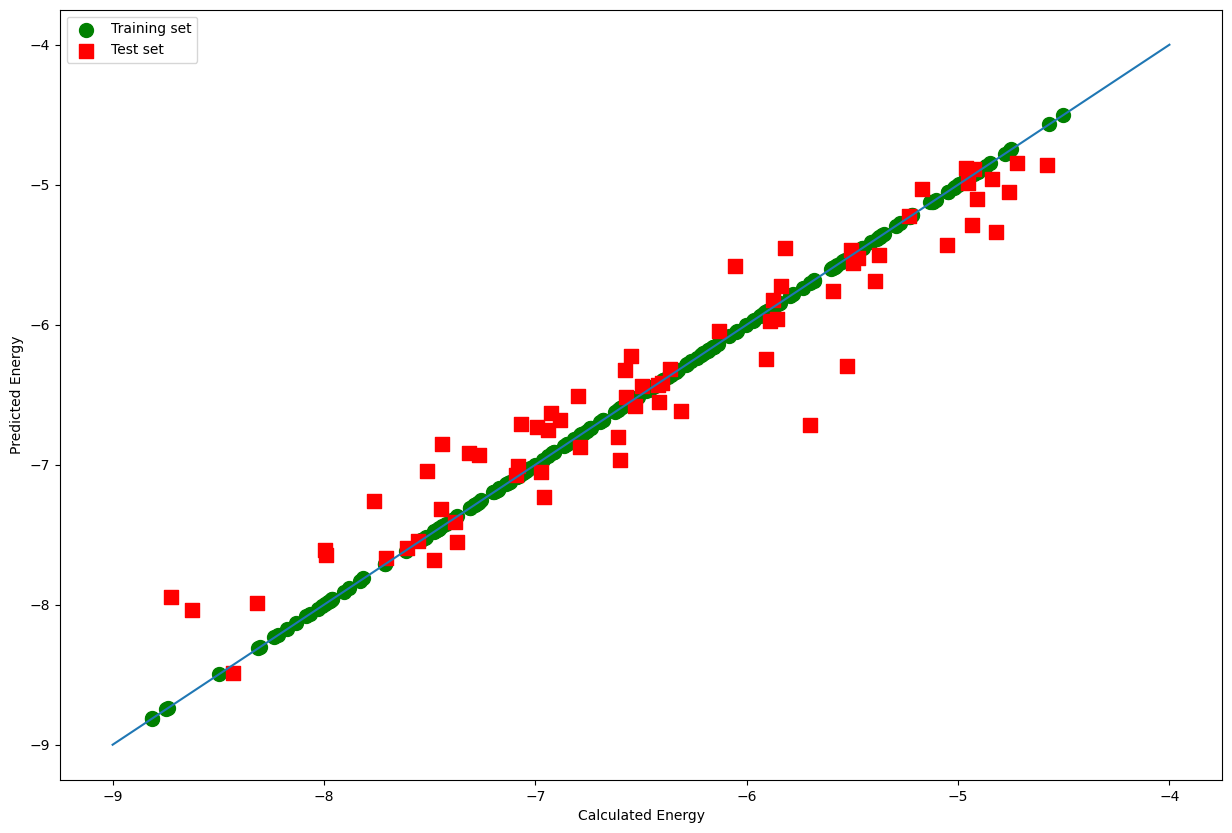

In [10]:
prediction_ef_test = xgb_ef.predict(X_test_ef)
r_sq_ef_test = metrics.r2_score(y_test_ef,prediction_ef_test)

print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_ef,prediction_ef_test)))
print('Root mean squared error of test set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_test_ef,prediction_ef_test))))
print('R^2 score on test data: {:0.3f}'.format(r_sq_ef_test))

plt.figure(figsize = (15,10))
plt.scatter(y_train_ef,prediction_ef_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_ef,prediction_ef_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([-9,-4],[-9,-4])
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

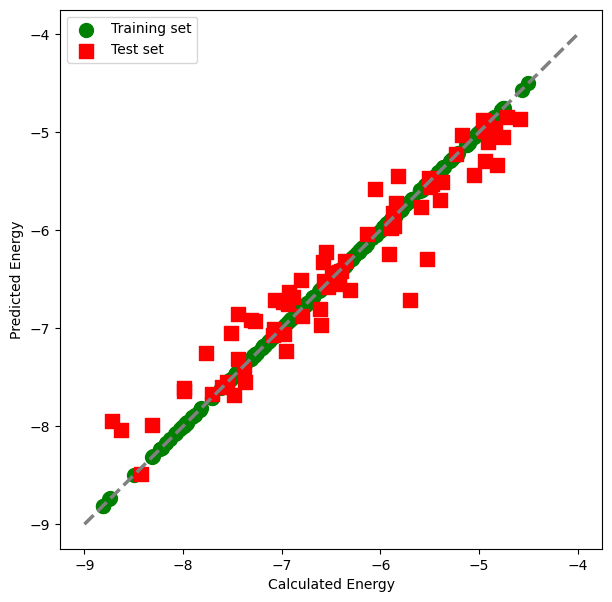

In [11]:
plt.figure(figsize = (7,7))
plt.scatter(y_train_ef,prediction_ef_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_ef,prediction_ef_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

In [12]:
## Data from FFNN model

In [13]:
X_train = pd.read_csv('Results_Ef/X_train_FFNN.csv')
X_val = pd.read_csv('Results_Ef/X_val_FFNN.csv')
X_test = pd.read_csv('Results_Ef/X_test_FFNN.csv')

y_train = pd.read_csv('Results_Ef/y_train_FFNN.csv')
y_val = pd.read_csv('Results_Ef/y_val_FFNN.csv')
y_test = pd.read_csv('Results_Ef/y_test_FFNN.csv')

In [14]:
y_train_ef = y_train['55']
y_val_ef = y_val['55']
y_test_ef = y_test['55']

Mean absolute error of training set: 0.001
Mean absolute error of validation set: 0.265
Mean absolute error of test set: 0.273


R^2 score on training data: 1.000
R^2 score on validation data: 0.828
R^2 score on test data: 0.898




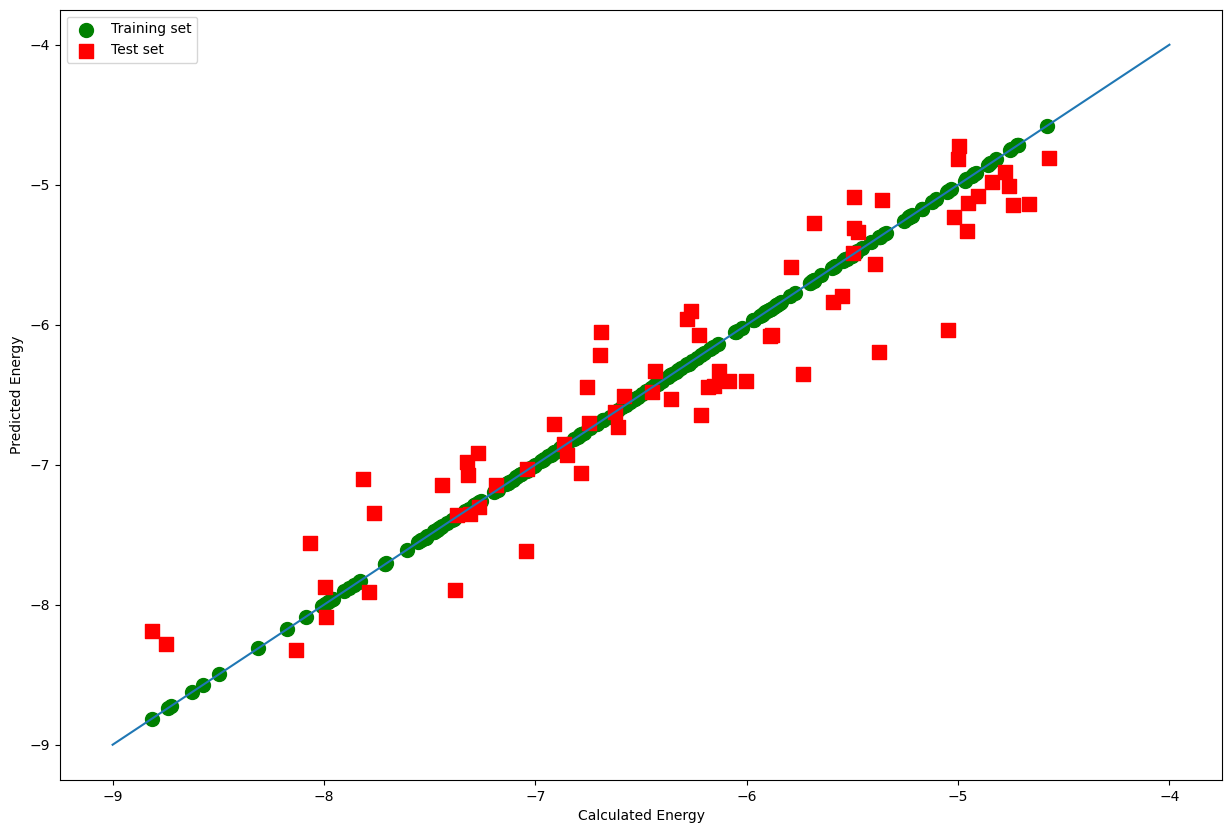

In [16]:
xgb_ef = xgb.XGBRegressor(random_state=16)
xgb_ef.fit(X_train, y_train_ef)

prediction_ef_train = xgb_ef.predict(X_train)
prediction_ef_val = xgb_ef.predict(X_val)
prediction_ef_test = xgb_ef.predict(X_test)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_ef,prediction_ef_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_ef,prediction_ef_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_ef,prediction_ef_test)))
print('\n')
r_sq_ef_train = metrics.r2_score(y_train_ef,prediction_ef_train)
r_sq_ef_val = metrics.r2_score(y_val_ef,prediction_ef_val)
r_sq_ef_test = metrics.r2_score(y_test_ef,prediction_ef_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_ef_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_ef_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_ef_test))
print('\n')

plt.figure(figsize = (15,10))
plt.scatter(y_train_ef,prediction_ef_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_ef,prediction_ef_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([-9,-4],[-9,-4])
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

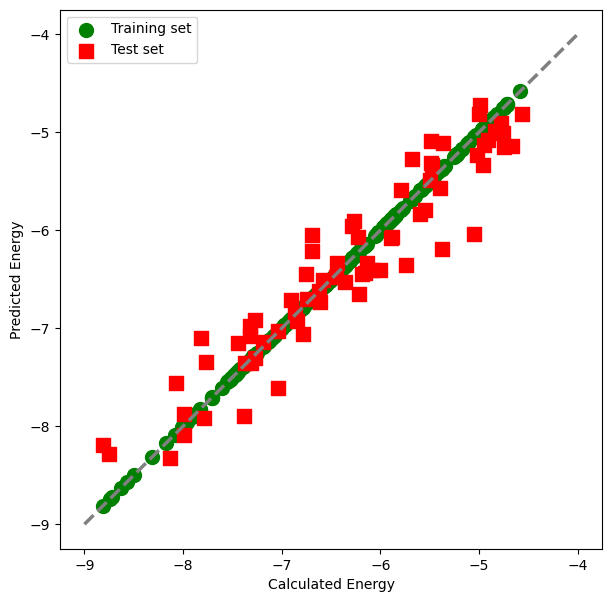

In [17]:
plt.figure(figsize = (7,7))
plt.scatter(y_train_ef,prediction_ef_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_ef,prediction_ef_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

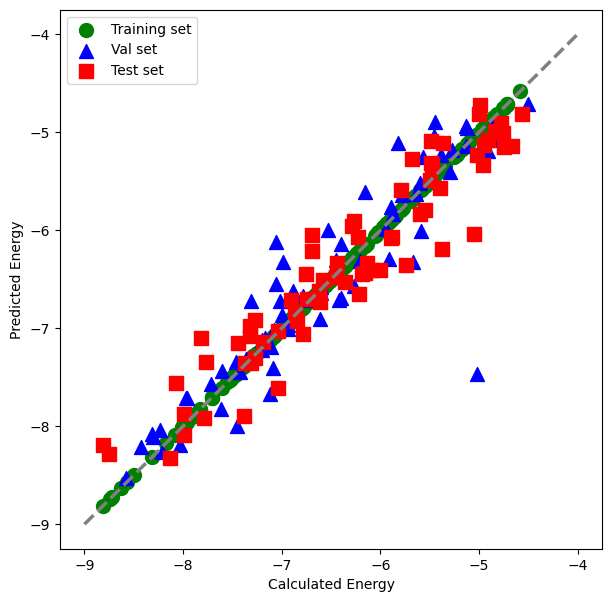

In [18]:
plt.figure(figsize = (7,7))
plt.scatter(y_train_ef,prediction_ef_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_val_ef,prediction_ef_val, color = 'b', s=100, marker='^', label='Val set')
plt.scatter(y_test_ef,prediction_ef_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Energy'),plt.ylabel('Predicted Energy')
plt.legend()
plt.show()

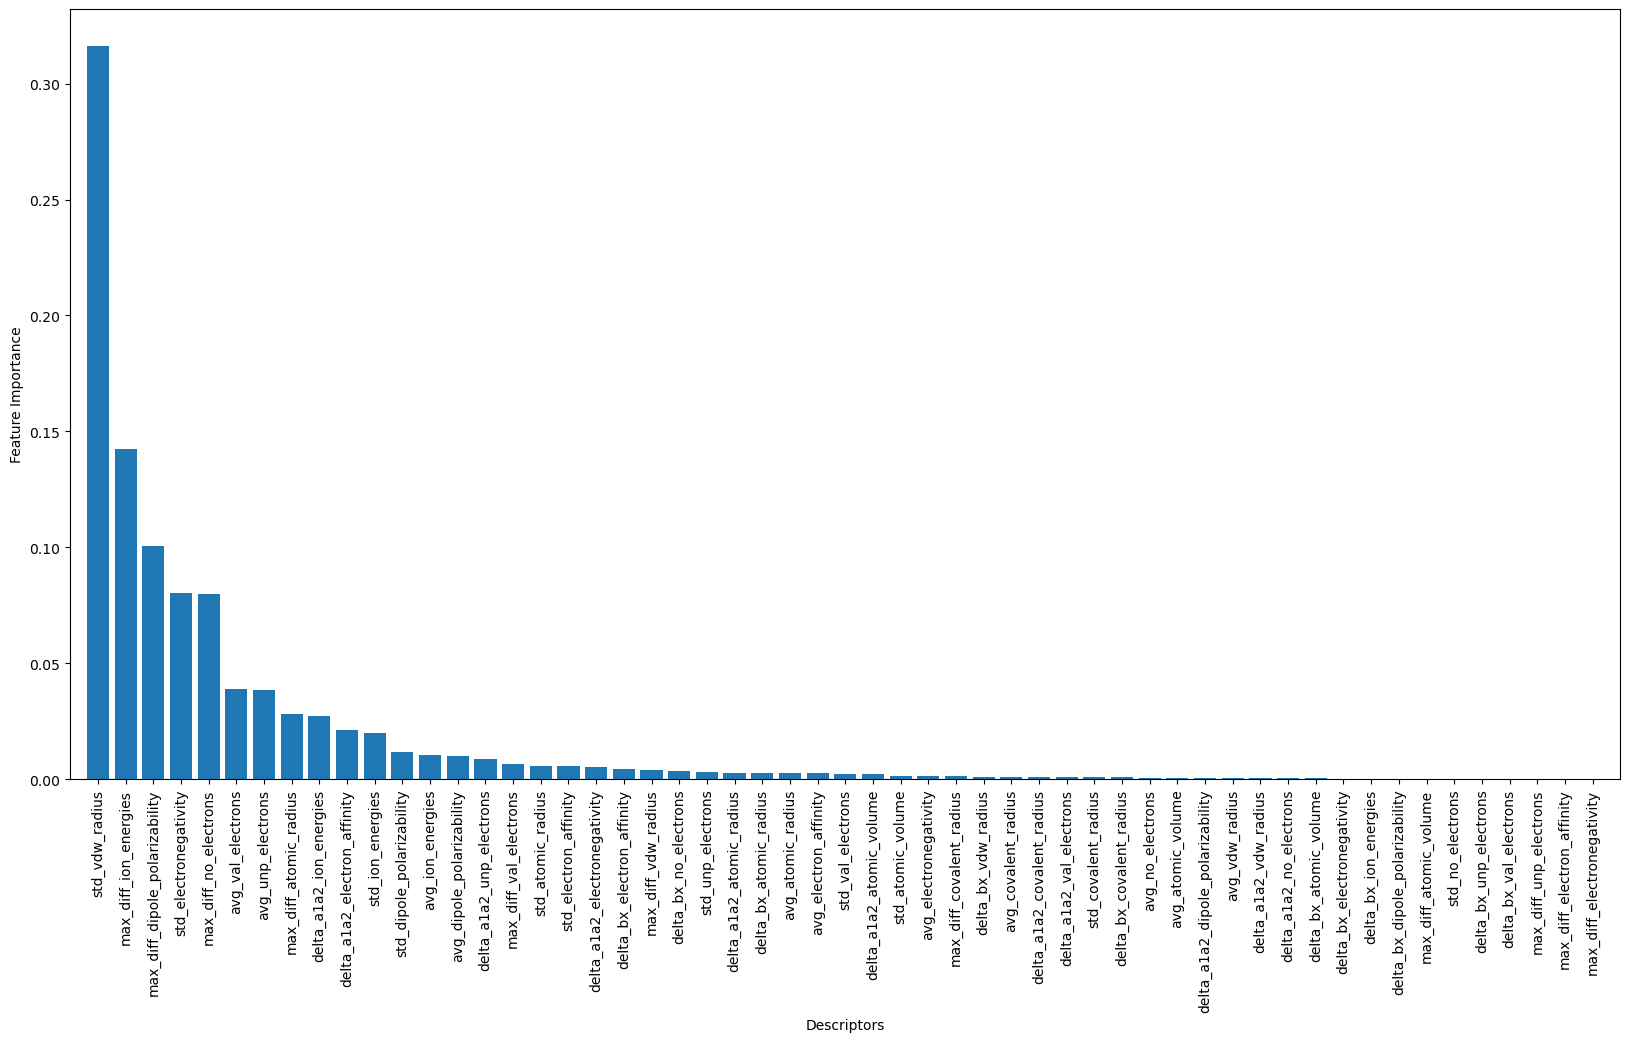

In [20]:
importances_ef = xgb_ef.feature_importances_
indices_ef = np.argsort(importances_ef)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train.shape[1]), importances_ef[indices_ef], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train.shape[1]), desc_labels[indices_ef],  rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Optuna - hyperparameter tuning

In [25]:
import optuna
import random

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,subsample=subsample,
                                     colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                                     min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,max_delta_step=max_delta_step,
                                     random_state=random_state)

    # Train model
    xgb_ef_optuna = model_xgb.fit(X_train, y_train_ef)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_ef_optuna = cross_val_score(xgb_ef_optuna,X_train,y_train_ef,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_ef_optuna = cv_scores_xgb_ef_optuna.mean()

    # Return best R2 scores
    r2_train = r2_score(y_train_ef, model_xgb.predict(X_train))
    r2_test = r2_score(y_test_ef, model_xgb.predict(X_test))
#    return avg_r2_cv_xgb_ef_optuna
    return r2_train,avg_r2_cv_xgb_ef_optuna,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_xgb = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_xgb.optimize(objective, n_trials=300)

[I 2025-04-03 14:46:15,178] A new study created in memory with name: no-name-872c5173-6e17-41ed-ab7a-71fa7a8b22ff
[I 2025-04-03 14:46:19,915] Trial 0 finished with values: [0.9429461368177244, 0.8892370785042312, 0.9317831975731643] and parameters: {'n_estimators': 138, 'max_depth': 40, 'learning_rate': 0.27636146469198075, 'subsample': 0.46066845075481133, 'colsample_bytree': 0.44859811425340834, 'gamma': 0.7707735725632592, 'reg_alpha': 2.672266986874428e-08, 'reg_lambda': 3.2691303109058494e-06, 'min_child_weight': 8, 'scale_pos_weight': 6, 'max_delta_step': 5.04352444301238}.
[I 2025-04-03 14:46:20,313] Trial 1 finished with values: [0.81335576084198, 0.7488290139696943, 0.7795845887287245] and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.09201139928373302, 'subsample': 0.5181742187729502, 'colsample_bytree': 0.15237932540160928, 'gamma': 5.020454570816117, 'reg_alpha': 3.7483295011385344e-08, 'reg_lambda': 1.2568744333401913e-07, 'min_child_weight': 2, 'sca

In [26]:
best_models = study_xgb.best_trials
#PRINT('Trial number',
for i in range(len(best_models)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models[i].number, '\nTrain R2:',best_models[i].values[0],'\nValid R2:',best_models[i].values[1],
         '\nTest  R2:',best_models[i].values[2],'\nParams  :',best_models[i].params,'\n=======')

Model No: 0 
Trial No: 62 
Train R2: 0.990976880549414 
Valid R2: 0.8922923435987492 
Test  R2: 0.921228381620414 
Params  : {'n_estimators': 110, 'max_depth': 19, 'learning_rate': 0.09365317995822628, 'subsample': 0.8500382070296735, 'colsample_bytree': 0.5943229620709671, 'gamma': 0.07905784664967608, 'reg_alpha': 0.029184067755344704, 'reg_lambda': 0.7615830325427473, 'min_child_weight': 4, 'scale_pos_weight': 8, 'max_delta_step': 8.442691579830644} 
Model No: 1 
Trial No: 82 
Train R2: 0.9925231465228501 
Valid R2: 0.8575835756144741 
Test  R2: 0.9031959443541204 
Params  : {'n_estimators': 80, 'max_depth': 28, 'learning_rate': 0.2550973814552912, 'subsample': 0.9372484333657731, 'colsample_bytree': 0.7198681296529659, 'gamma': 0.07905784664967608, 'reg_alpha': 2.790211456024044e-07, 'reg_lambda': 0.561521997754265, 'min_child_weight': 3, 'scale_pos_weight': 6, 'max_delta_step': 5.815298828976378} 
Model No: 2 
Trial No: 168 
Train R2: 0.992009767842575 
Valid R2: 0.891211040720908

In [28]:
best_models_pd = pd.DataFrame({'Trial number': [best_models[i].number for i in range(len(best_models))],
                                             'Train R2': [best_models[i].values[0] for i in range(len(best_models))],
                                             'Test R2': [best_models[i].values[2] for i in range(len(best_models))],
                                             'CV R2': [best_models[i].values[1] for i in range(len(best_models))],
                                             'n_estimators': [best_models[i].params['n_estimators'] for i in range(len(best_models))],
                                             'max_depth': [best_models[i].params['max_depth'] for i in range(len(best_models))],
                                             'learning_rate': [best_models[i].params['learning_rate'] for i in range(len(best_models))],
                                             'subsample': [best_models[i].params['subsample'] for i in range(len(best_models))],
                                             'colsample_bytree': [best_models[i].params['colsample_bytree'] for i in range(len(best_models))],
                                             'gamma': [best_models[i].params['gamma'] for i in range(len(best_models))],
                                             'reg_alpha': [best_models[i].params['reg_alpha'] for i in range(len(best_models))],
                                             'reg_lambda': [best_models[i].params['reg_lambda'] for i in range(len(best_models))],
                                             'min_child_weight': [best_models[i].params['min_child_weight'] for i in range(len(best_models))],
                                             'scale_pos_weight': [best_models[i].params['scale_pos_weight'] for i in range(len(best_models))],
                                             'max_delta_step': [best_models[i].params['max_delta_step'] for i in range(len(best_models))]
                                            })
best_models_pd.to_excel('Results_Ef/XGBRegressor_Ef_HP_Optuna.xlsx',index=False)

In [29]:
## 1,7,15,16,17,18

In [51]:
import optuna
import random

def detailed_objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models[18].params['n_estimators'],
                                    max_depth=best_models[18].params['max_depth'],
                                    learning_rate=best_models[18].params['learning_rate'],
                                    subsample=best_models[18].params['subsample'],
                                    colsample_bytree=best_models[18].params['colsample_bytree'],
                                    gamma=best_models[18].params['gamma'],
                                    reg_alpha=best_models[18].params['reg_alpha'],
                                    reg_lambda=best_models[18].params['reg_lambda'],
                                    min_child_weight=best_models[18].params['min_child_weight'],
                                    scale_pos_weight=best_models[18].params['scale_pos_weight'],
                                    max_delta_step=best_models[18].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_ef_optuna = model_xgb.fit(X_train,y_train_ef)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_ef_optuna = cross_val_score(xgb_ef_optuna,X_train,y_train_ef,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_ef_optuna = cv_scores_xgb_ef_optuna.mean()

    # Return best R2 scores and MAE
    r2_train = r2_score(y_train_ef, model_xgb.predict(X_train))
    r2_test = r2_score(y_test_ef, model_xgb.predict(X_test))
    r2_val = r2_score(y_val_ef, model_xgb.predict(X_val))

    mae_train = mean_absolute_error(y_train_ef, model_xgb.predict(X_train))
    mae_test = mean_absolute_error(y_test_ef, model_xgb.predict(X_test))
    mae_val = mean_absolute_error(y_val_ef, model_xgb.predict(X_val))
    
    print('R2 scores (train, CV, val, test) = ', r2_train,avg_r2_cv_xgb_ef_optuna,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)

    ## Exporting the results
    y_pred_train_ef = model_xgb.predict(X_train)
    y_pred_test_ef = model_xgb.predict(X_test)
    y_pred_val_ef = model_xgb.predict(X_val)
    
    X_train.to_excel('Results_Ef/X_train_Optuna.xlsx',index=False)
    X_test.to_excel('Results_Ef/X_test_Optuna.xlsx',index=False)
    X_val.to_excel('Results_Ef/X_val_Optuna.xlsx',index=False)
    
    y_train_ef.to_excel('Results_Ef/y_train_Optuna.xlsx',index=False)
    y_test_ef.to_excel('Results_Ef/y_test_Optuna.xlsx',index=False)      
    y_val_ef.to_excel('Results_Ef/y_val_Optuna.xlsx',index=False)      
    
    pd.DataFrame(y_pred_train_ef).to_excel('Results_Ef/y_pred_train_Optuna_18.xlsx',index=False)
    pd.DataFrame(y_pred_test_ef).to_excel('Results_Ef/y_pred_test_Optuna_18.xlsx',index=False)    
    pd.DataFrame(y_pred_val_ef).to_excel('Results_Ef/y_pred_val_Optuna_18.xlsx',index=False)    

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train_ef, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val_ef, model_xgb.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{avg_r2_cv_xgb_ef_optuna:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test_ef, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
    ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
    ax1.legend()
    
    ax2.scatter(y_train_ef, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test_ef, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
    ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
    ax2.legend()
    
    plt.show()

R2 scores (train, CV, val, test) =  0.9894605861602163 0.9151908389287637 0.8441724391134897 0.9417149855803081
MAE values (train, val, test) =  0.07579958401152354 0.22154468829220006 0.20411538529771633


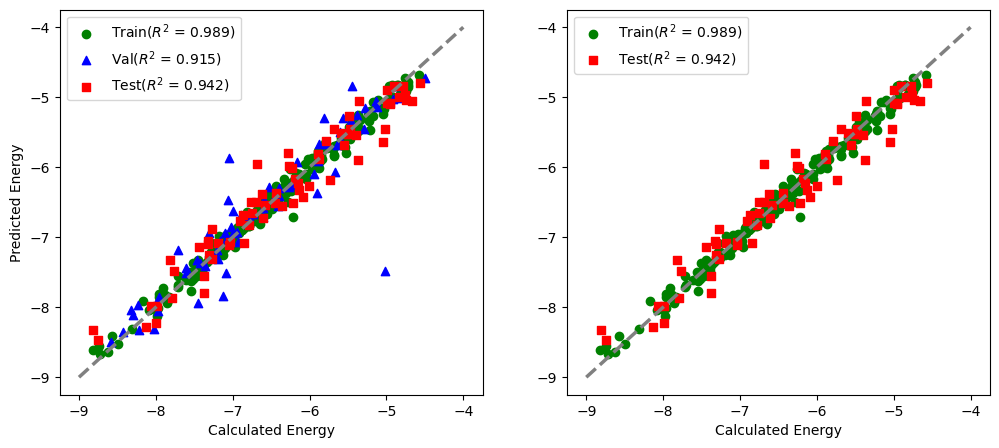

In [52]:
detailed_objective(study_xgb.best_trials[18])

R2 scores (train, CV, val, test) =  0.9875624417194208 0.9167612373954723 0.84464726162913 0.9442749252582903
MAE values (train, val, test) =  0.08050509713908124 0.24423931826427797 0.19207918600340548


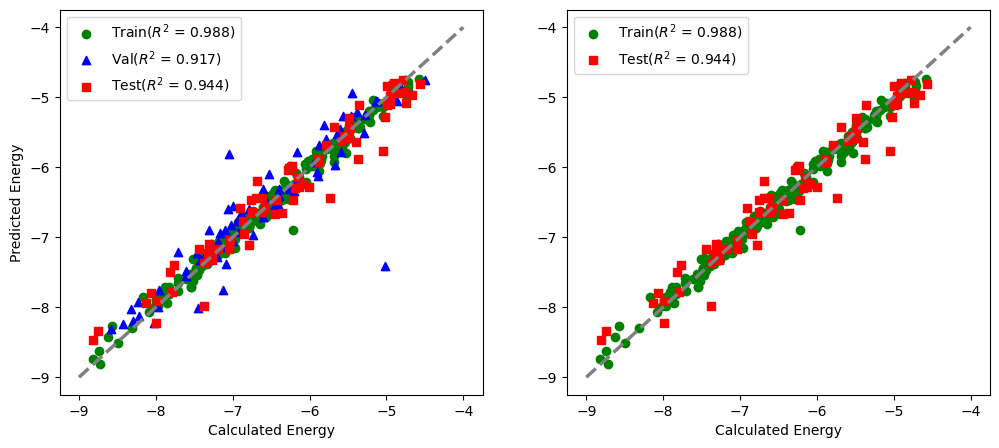

In [50]:
detailed_objective(study_xgb.best_trials[17])

R2 scores (train, CV, val, test) =  0.987689346659041 0.9157110063310615 0.8417020695412694 0.9466596122517917
MAE values (train, val, test) =  0.07858646432327274 0.22638121254534305 0.1949695854538242


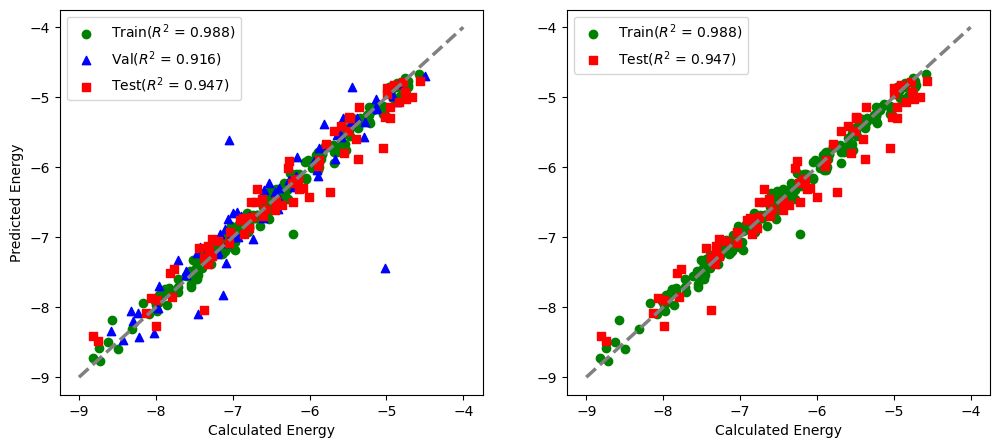

In [48]:
detailed_objective(study_xgb.best_trials[16])

R2 scores (train, CV, val, test) =  0.9876010573009149 0.911937579336261 0.8452981241907558 0.950318469222276
MAE values (train, val, test) =  0.080781677208027 0.22444599357650585 0.18544892079645112


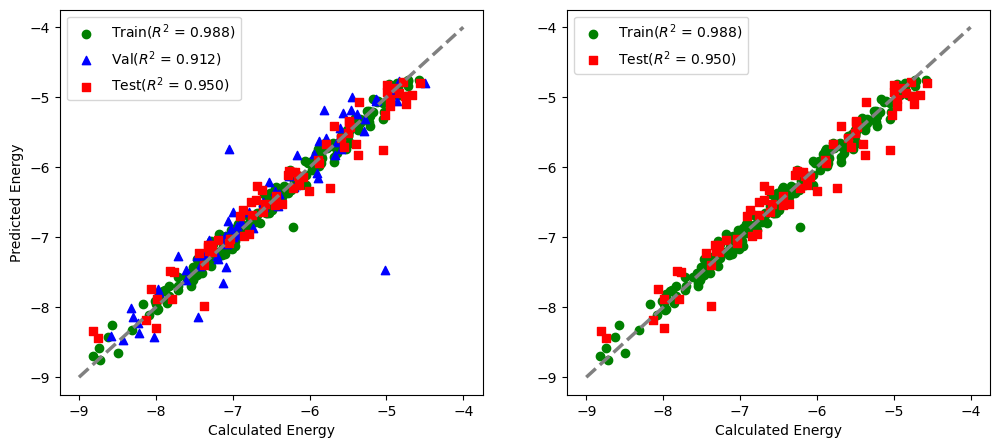

In [46]:
detailed_objective(study_xgb.best_trials[15])

R2 scores (train, CV, val, test) =  0.9838718940782004 0.9193041562798998 0.8396030268373443 0.9499499593398882
MAE values (train, val, test) =  0.08787813851431919 0.21524536944037653 0.19199199635434996


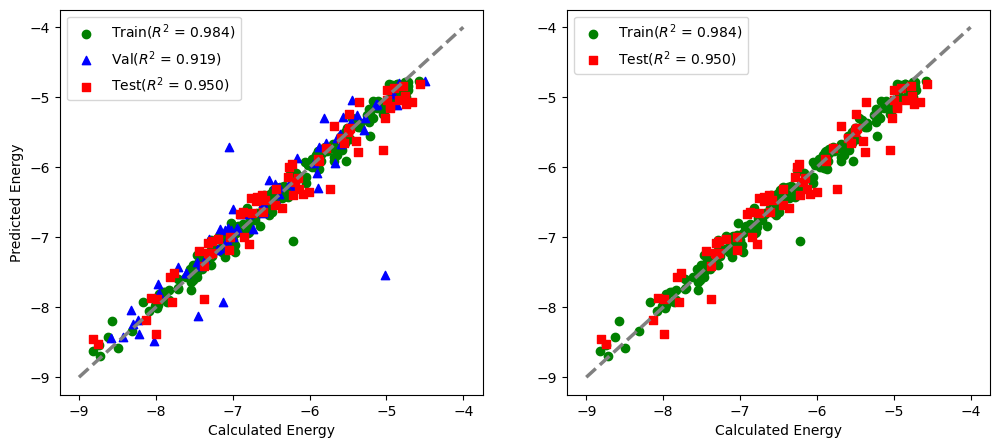

In [42]:
detailed_objective(study_xgb.best_trials[7])

R2 scores (train, CV, val, test) =  0.9925231465228501 0.8575835756144741 0.8295205326985349 0.9031959443541204
MAE values (train, val, test) =  0.06298036743261669 0.2743563131946973 0.25214159353854787


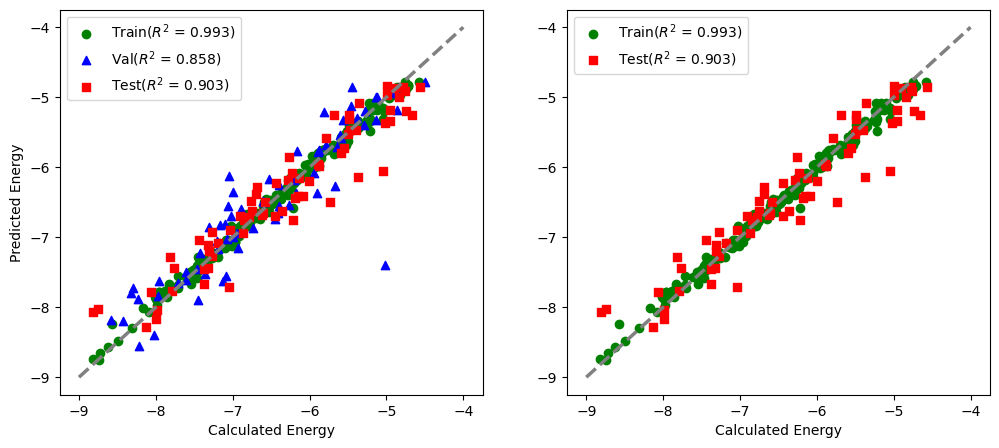

In [44]:
detailed_objective(study_xgb.best_trials[1])

In [ ]:
## 17 is the best 

In [72]:
import optuna
import random

def detailed_objective_best(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models[17].params['n_estimators'],
                                    max_depth=best_models[17].params['max_depth'],
                                    learning_rate=best_models[17].params['learning_rate'],
                                    subsample=best_models[17].params['subsample'],
                                    colsample_bytree=best_models[17].params['colsample_bytree'],
                                    gamma=best_models[17].params['gamma'],
                                    reg_alpha=best_models[17].params['reg_alpha'],
                                    reg_lambda=best_models[17].params['reg_lambda'],
                                    min_child_weight=best_models[17].params['min_child_weight'],
                                    scale_pos_weight=best_models[17].params['scale_pos_weight'],
                                    max_delta_step=best_models[17].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_ef_optuna = model_xgb.fit(X_train,y_train_ef)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_ef_optuna = cross_val_score(xgb_ef_optuna,X_train,y_train_ef,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_ef_optuna = cv_scores_xgb_ef_optuna.mean()

    # Return best R2 scores and MAE
    r2_train = r2_score(y_train_ef, model_xgb.predict(X_train))
    r2_test = r2_score(y_test_ef, model_xgb.predict(X_test))
    r2_val = r2_score(y_val_ef, model_xgb.predict(X_val))

    mae_train = mean_absolute_error(y_train_ef, model_xgb.predict(X_train))
    mae_test = mean_absolute_error(y_test_ef, model_xgb.predict(X_test))
    mae_val = mean_absolute_error(y_val_ef, model_xgb.predict(X_val))
    
    print('R2 scores (train, CV, val, test) = ', r2_train,avg_r2_cv_xgb_ef_optuna,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)

    ## Exporting the results
    y_pred_train_ef = model_xgb.predict(X_train)
    y_pred_test_ef = model_xgb.predict(X_test)
    y_pred_val_ef = model_xgb.predict(X_val)
    
    X_train.to_excel('Results_Ef/X_train_Optuna.xlsx',index=False)
    X_test.to_excel('Results_Ef/X_test_Optuna.xlsx',index=False)
    X_val.to_excel('Results_Ef/X_val_Optuna.xlsx',index=False)
    
    y_train_ef.to_excel('Results_Ef/y_train_Optuna.xlsx',index=False)
    y_test_ef.to_excel('Results_Ef/y_test_Optuna.xlsx',index=False)      
    y_val_ef.to_excel('Results_Ef/y_val_Optuna.xlsx',index=False)      
    
    pd.DataFrame(y_pred_train_ef).to_excel('Results_Ef/y_pred_train_Optuna_17.xlsx',index=False)
    pd.DataFrame(y_pred_test_ef).to_excel('Results_Ef/y_pred_test_Optuna_17.xlsx',index=False)    
    pd.DataFrame(y_pred_val_ef).to_excel('Results_Ef/y_pred_val_Optuna_17.xlsx',index=False)    

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train_ef, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val_ef, model_xgb.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{avg_r2_cv_xgb_ef_optuna:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test_ef, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
    ax1.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
    ax1.legend()
    
    ax2.scatter(y_train_ef, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test_ef, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.plot([-9,-4],[-9,-4],color='gray',linestyle='dashed',linewidth=2.5)
    ax2.set_xlabel('Calculated Energy'),ax1.set_ylabel('Predicted Energy')
    ax2.legend()
    plt.show()

    fig,(ax3,ax4) = plt.subplots(1,2,figsize=(12,5))
    importances_xgb_ef = model_xgb.feature_importances_
    indices_xgb_ef = np.argsort(importances_xgb_ef)[::-1]
    ax3.bar(range(6), importances_xgb_ef[indices_xgb_ef][:6], align='center')
    desc_labels_ef = df.columns[26:]
    ax3.set_xticks(range(6), desc_labels_ef[indices_xgb_ef][:6],  rotation=90)
    ax3.set_xlim([-0.5, 5.5])
    ax3.set_ylabel('Feature Importance')
    ax3.set_xlabel('Descriptors')

    ax4.bar(range(12), importances_xgb_ef[indices_xgb_ef][:12], align='center')
    desc_labels_ef = df.columns[26:]
    ax4.set_xticks(range(12), desc_labels_ef[indices_xgb_ef][:12],  rotation=90)
    ax4.set_xlim([-0.5, 11.5])
    ax4.set_ylabel('Feature Importance')
    ax4.set_xlabel('Descriptors')
    plt.show()

    data_feature_imp_hp = {'feature': desc_labels_ef[indices_xgb_ef], 'importance':importances_xgb_ef[indices_xgb_ef]}
    pd_feature_imp_hp = pd.DataFrame(data_feature_imp_hp)
    pd_feature_imp_hp.to_csv('Results_Ef/feature_importance_ef_XGB_hp.csv',index=False)

    fig,ax = plt.subplots(nrows = 5, ncols = 3,figsize = (18,30))
    nrows = 5
    ncols = 3
    count = 0
    for i in range(nrows):
        for j in range(ncols):
            
            ax[i,j].scatter(df[desc_labels_ef[indices_xgb_ef][count]],df['Ef_per_cell'])
            ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Ef_per_cell'), ax[i,j].set_title(desc_labels_ef[indices_xgb_ef][count])
            
            count = count+1
    
    plt.show()

R2 scores (train, CV, val, test) =  0.9875624417194208 0.9167612373954723 0.84464726162913 0.9442749252582903
MAE values (train, val, test) =  0.08050509713908124 0.24423931826427797 0.19207918600340548


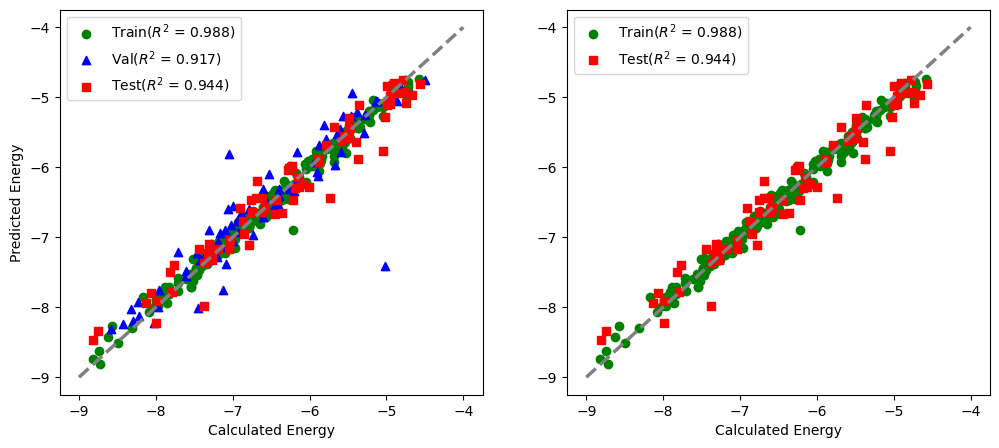

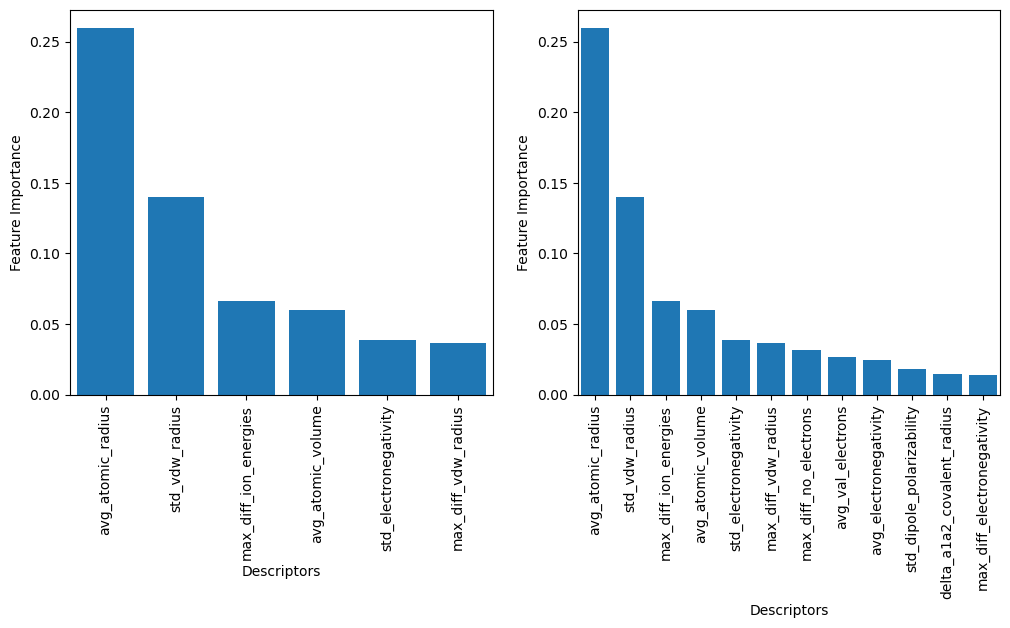

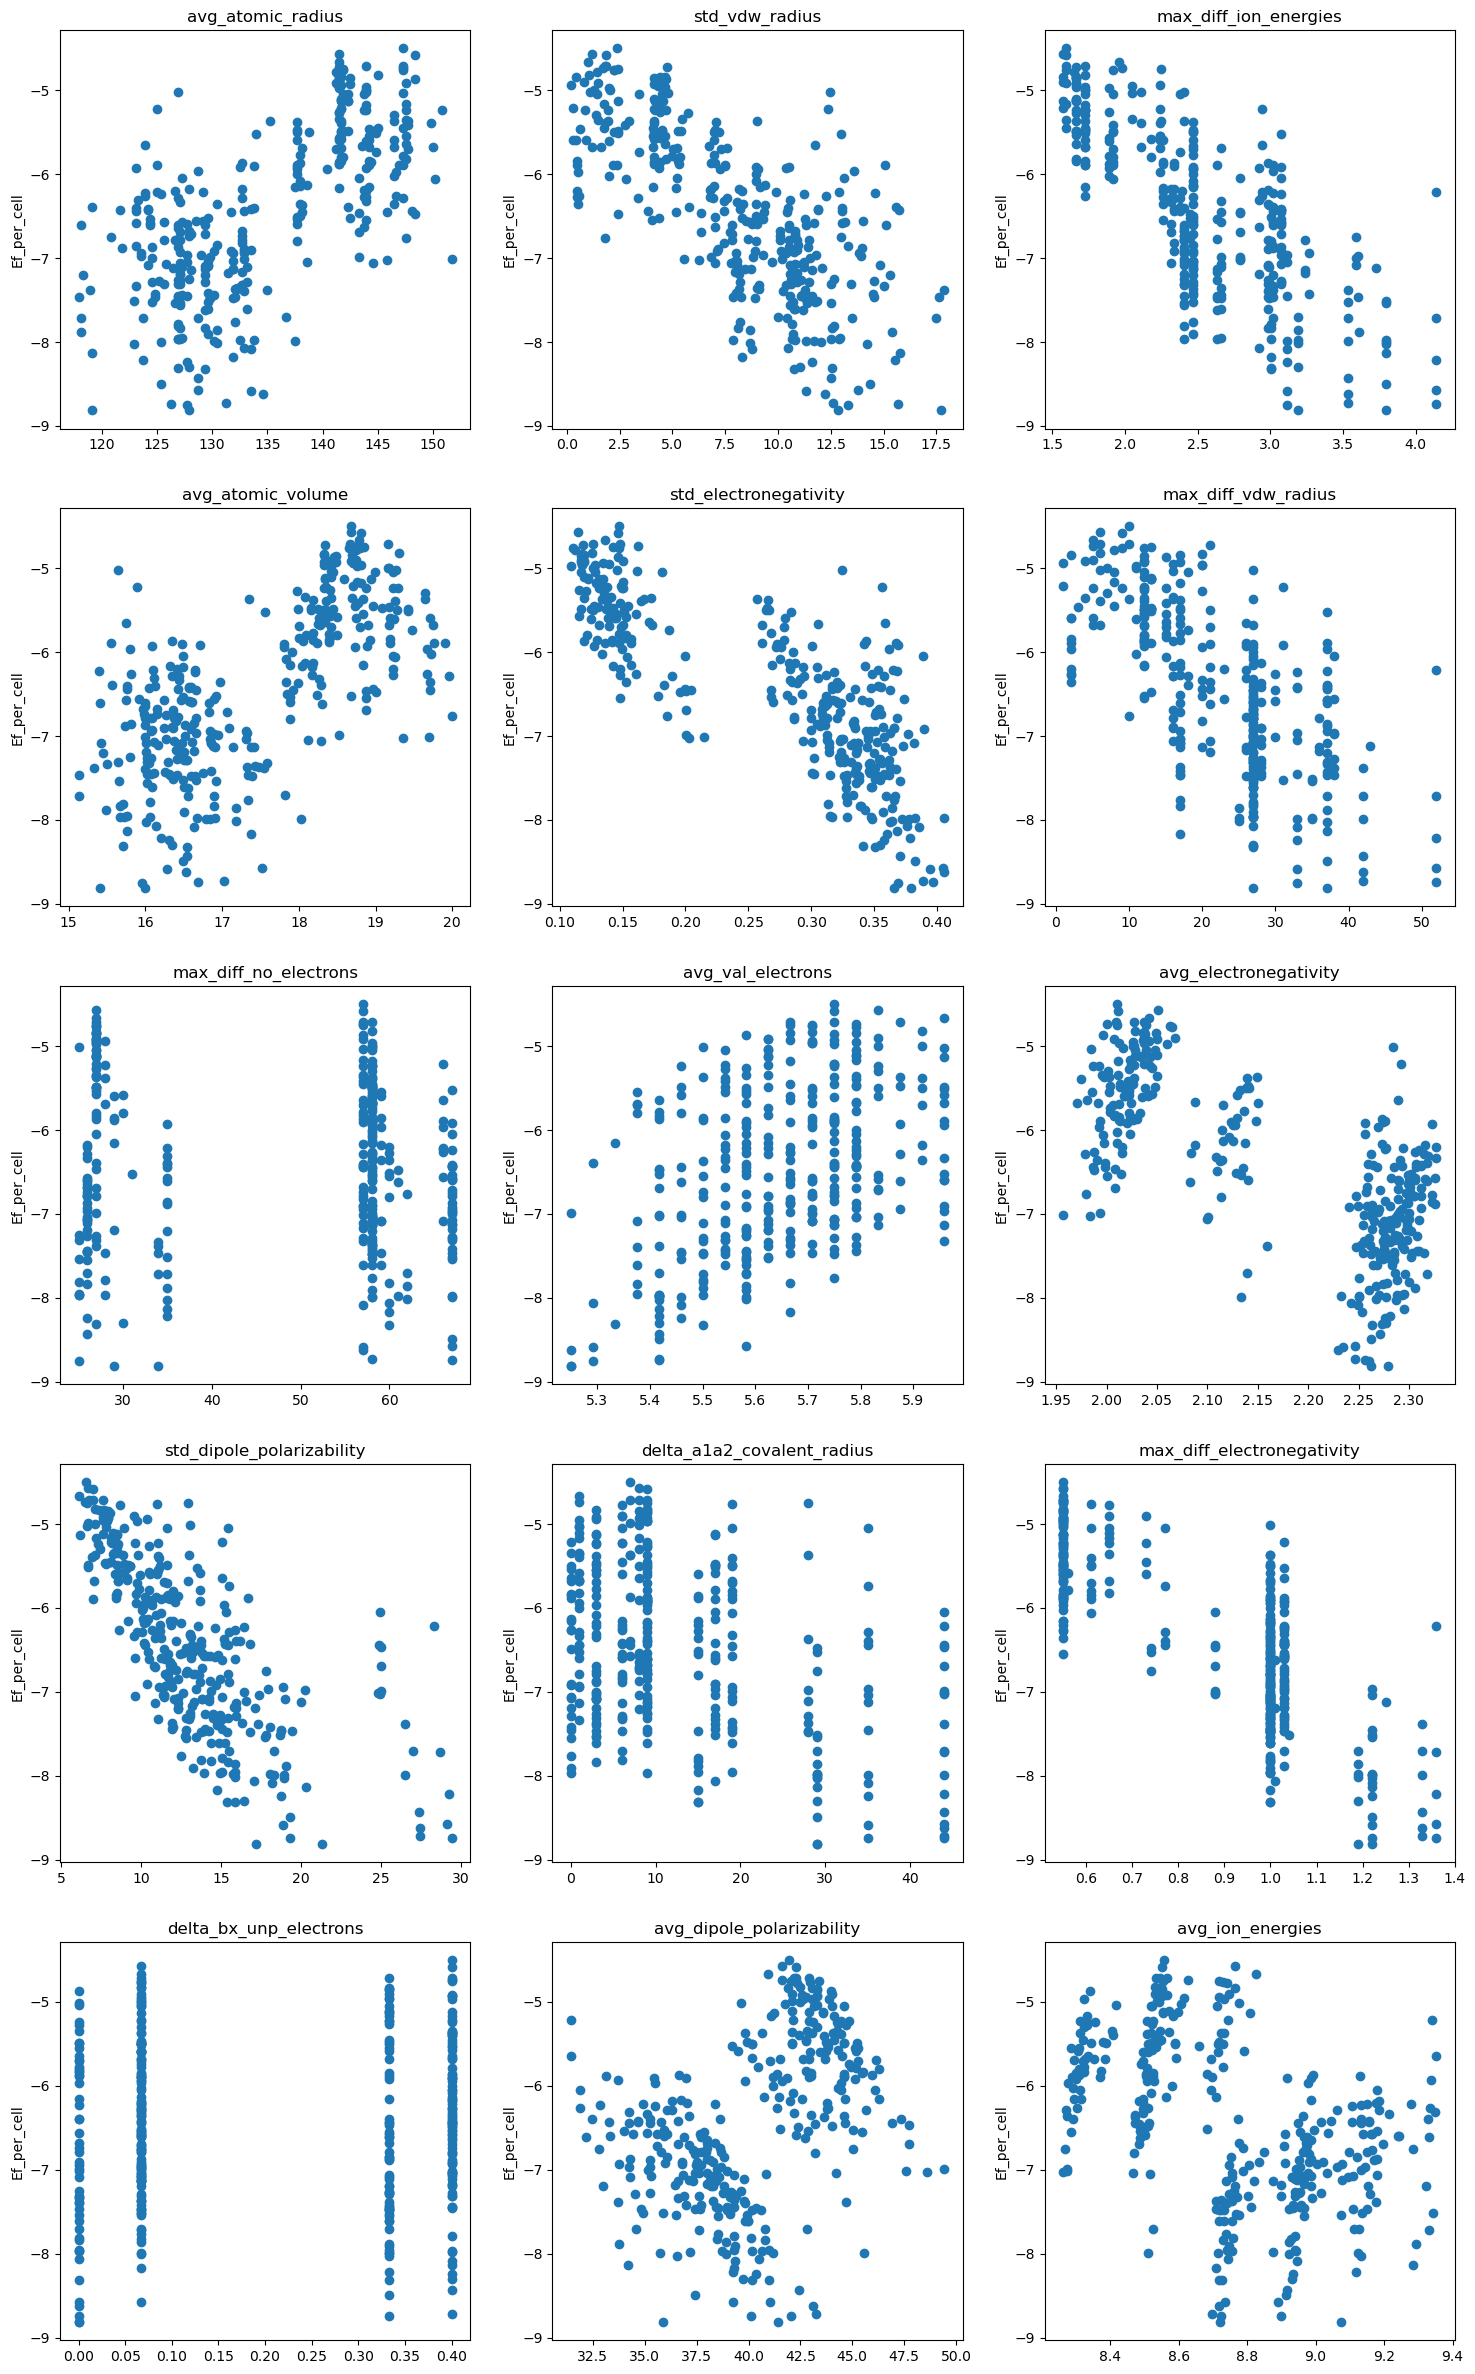

In [73]:
detailed_objective_best(study_xgb.best_trials[17])

In [1]:
## predicting 785 candidates using the best model (17)

In [74]:
## Params  : {'n_estimators': 110, 'max_depth': 5, 'learning_rate': 0.09365317995822628, 'subsample': 0.47056838349217,
## 'colsample_bytree': 0.5943229620709671, 'gamma': 0.07905784664967608, 'reg_alpha': 7.613636830333616e-05,
## 'reg_lambda': 0.7615830325427473, 'min_child_weight': 4, 'scale_pos_weight': 8, 'max_delta_step': 8.578347285490128}

In [79]:
xgb_ef_best_17 = xgb.XGBRegressor(n_estimators=110, max_depth=5, learning_rate=0.09365317995822628, subsample=0.47056838349217,
                               colsample_bytree=0.5943229620709671, gamma=0.07905784664967608, reg_alpha=7.613636830333616e-05,
                               reg_lambda=0.7615830325427473, min_child_weight=4, scale_pos_weight=8, max_delta_step=8.578347285490128, random_state=42)
xgb_ef_best_17.fit(X_train, y_train_ef)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5943229620709671, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.07905784664967608,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09365317995822628,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=8.578347285490128, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=110, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [75]:
candidates_785 = pd.read_excel('Results_Ef/descriptors_for_891_candidates.xlsx','without_Si')

In [76]:
X_ef_features = ['avg_vdw_radius', 'delta_a1a2_vdw_radius', 'delta_bx1418bx58914_avg_vdw_radius', 'max_diff_vdw_radius', 'std_vdw_radius', 
           'avg_covalent_radius', 'delta_a1a2_covalent_radius', 'delta_bx1418bx58914_avg_covalent_radius', 'max_diff_covalent_radius', 
           'std_covalent_radius', 'avg_atomic_radius', 'delta_a1a2_atomic_radius', 'delta_bx1418bx58914_avg_atomic_radius', 'max_diff_atomic_radius', 
           'std_atomic_radius', 'avg_atomic_volume', 'delta_a1a2_atomic_volume', 'delta_bx1418bx58914_avg_atomic_volume', 'max_diff_atomic_volume', 
           'std_atomic_volume', 'avg_dipole_polarizability', 'delta_a1a2_dipole_polarizability', 'delta_bx1418bx58914_avg_dipole_polarizability', 
           'max_diff_dipole_polarizability', 'std_dipole_polarizability', 'avg_val_electrons', 'delta_a1a2_val_electrons', 
           'delta_bx1418bx58914_avg_val_electrons', 'max_diff_val_electrons', 'std_val_electrons', 'avg_unp_electrons', 'delta_a1a2_unp_electrons',
           'delta_bx1418bx58914_avg_unp_electrons', 'max_diff_unp_electrons', 'std_unp_electrons', 'avg_ion_energies', 'delta_a1a2_ion_energies', 
           'delta_bx1418bx58914_avg_ion_energies', 'max_diff_ion_energies', 'std_ion_energies', 'avg_no_electrons', 'delta_a1a2_no_electrons', 
           'delta_bx1418bx58914_avg_no_electrons', 'max_diff_no_electrons', 'std_no_electrons', 'avg_electronegativity', 'delta_a1a2_electronegativity',
           'delta_bx1418bx58914_avg_electronegativity', 'max_diff_electronegativity', 'std_electronegativity', 'avg_electron_affinity', 
           'delta_a1a2_electron_affinity', 'delta_bx1418bx58914_avg_electron_affinity', 'max_diff_electron_affinity', 'std_electron_affinity']

In [78]:
X_785 = candidates_785[X_ef_features]
X_785.columns = range(55)

In [80]:
pred_y_785 = xgb_ef_best_17.predict(X_785)

In [81]:
pd.DataFrame(pred_y_785).to_csv('Results_Ef/best_XGB_Ef_pred_785.csv',index=False)